# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [10]:
df = pd.read_csv('demo01_tratada.csv')
df.head()

,Unnamed: 0,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,1,0,58.832877,3.106849,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,1,0,1,0,52.356164,8.358904,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
2,2,0,1,0,52.356164,8.358904,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
3,3,1,1,0,46.224658,2.106849,1,1,1,1,...,1,0,0,0,0,1,0,0,0,0
4,4,1,0,0,29.230137,3.021918,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [21]:
df.shape

(16650, 34)

In [29]:
df.isnull().sum()

posse_de_veiculo                          0
posse_de_imovel                           0
qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
sexo_F                                    0
sexo_M                                    0
tipo_renda_Commercial associate           0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Academic degree                  0
educacao_Higher education                 0
educacao_Incomplete higher                0
educacao_Lower secondary                  0
educacao_Secondary / secondary s

In [19]:
X = df.drop('mau', axis = 1)
X.head()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,1,1,0,58.832877,3.106849,1,0,0,0,2,...,1,0,0,0,0,1,0,0,0,0
1,0,1,0,52.356164,8.358904,1,0,1,1,1,...,0,0,1,0,0,1,0,0,0,0
2,0,1,0,52.356164,8.358904,1,0,1,1,1,...,0,0,1,0,0,1,0,0,0,0
3,1,1,0,46.224658,2.106849,1,1,1,1,2,...,1,0,0,0,0,1,0,0,0,0
4,1,0,0,29.230137,3.021918,1,0,0,0,2,...,1,0,0,0,0,1,0,0,0,0


In [23]:
X.shape

(16650, 33)

In [18]:
y = df.mau
y

0        1
1        1
2        1
3        1
4        1
        ..
16645    0
16646    0
16647    0
16648    0
16649    0
Name: mau, Length: 16650, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [97]:
clf = DecisionTreeClassifier(random_state = 100)
clf = clf.fit(X_train, y_train)

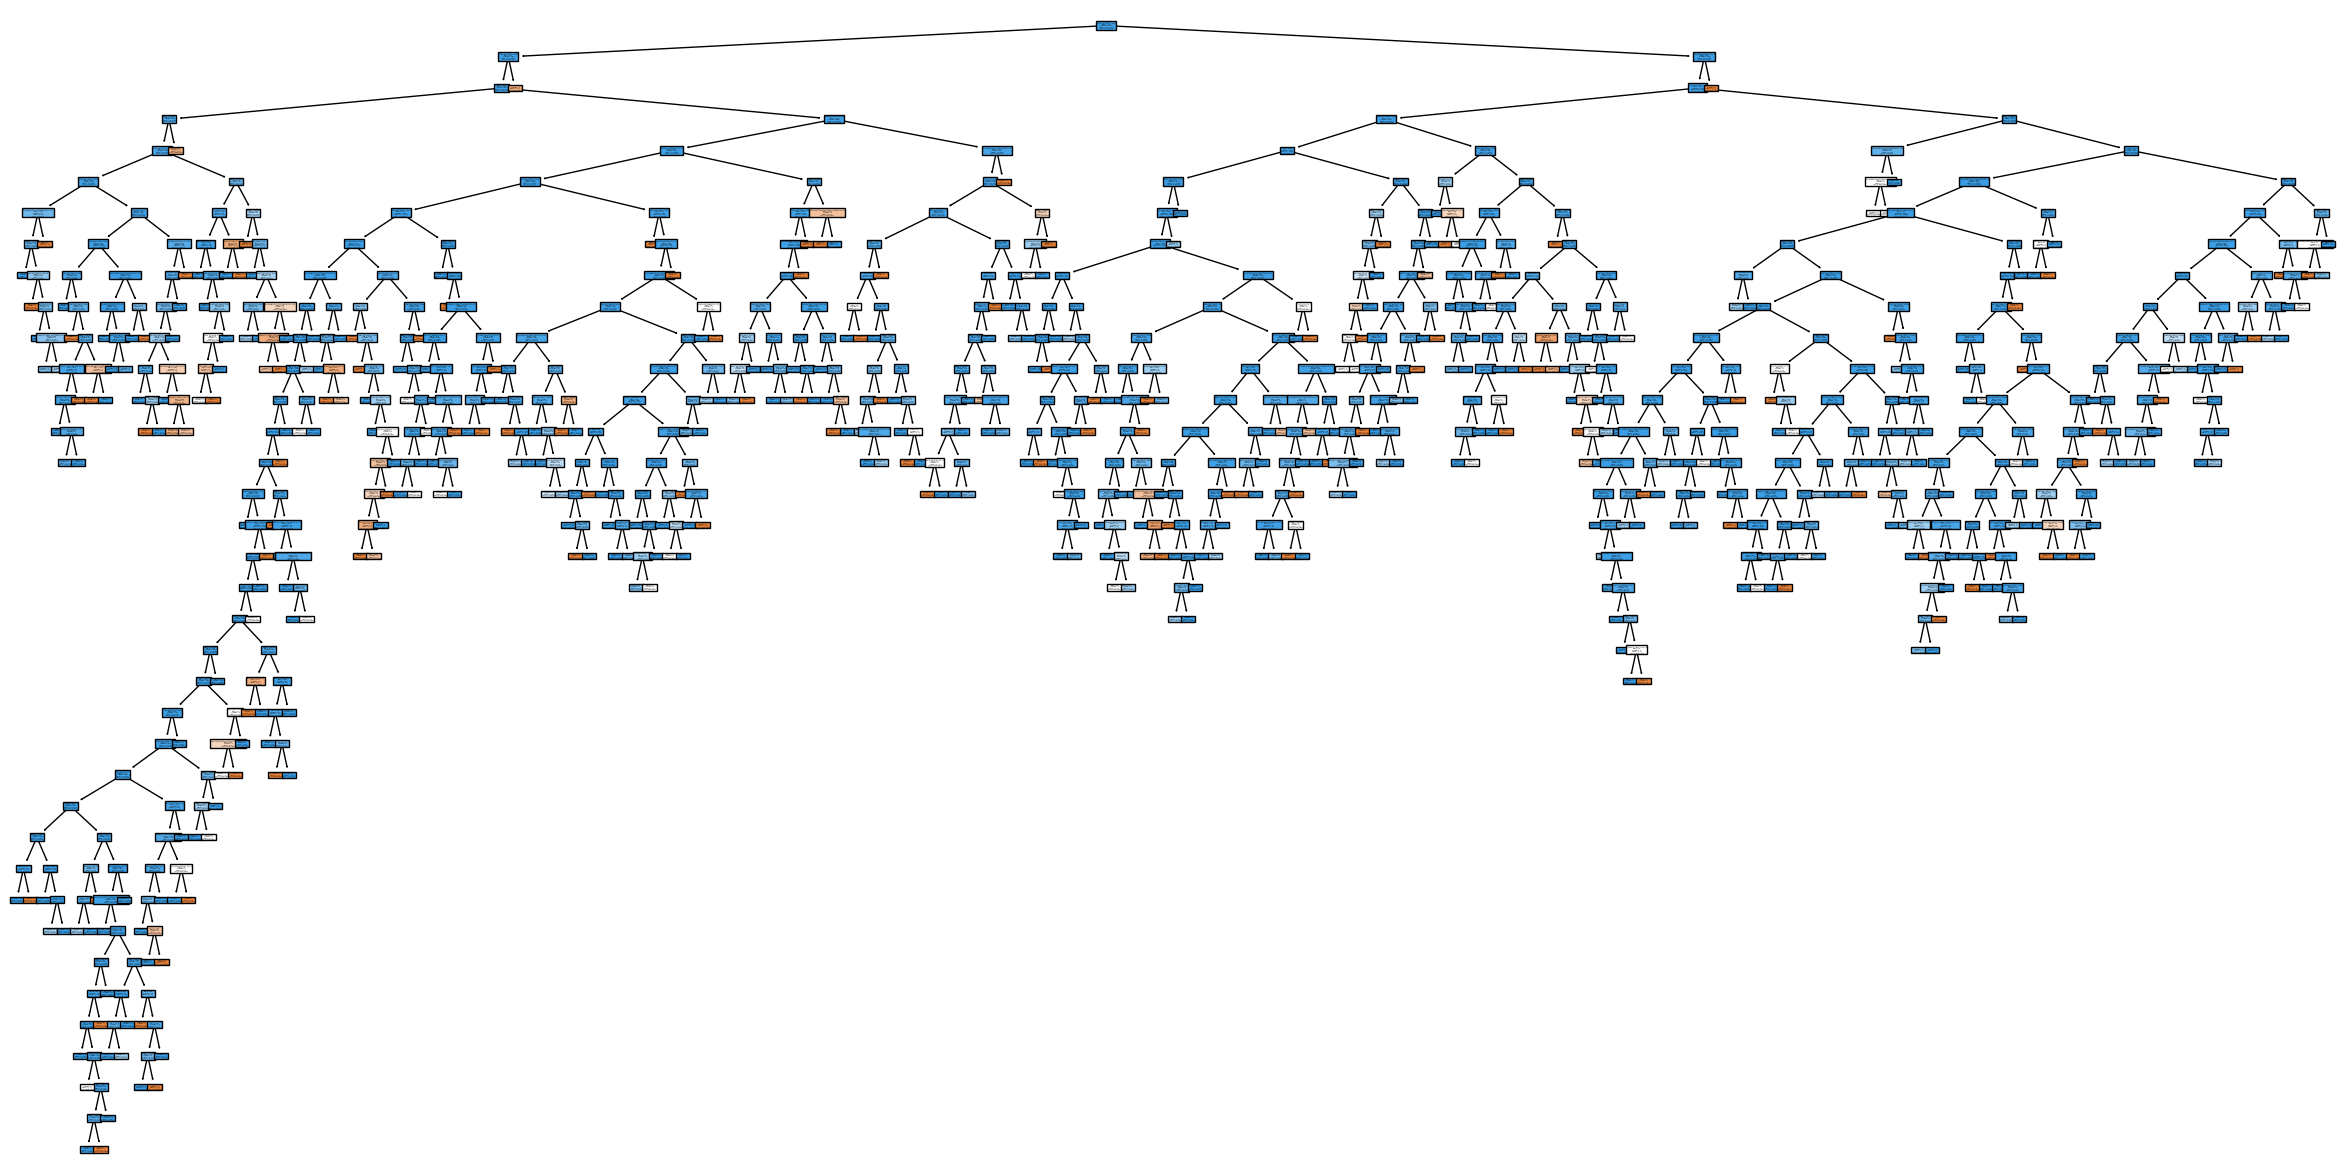

In [68]:
plt.figure(figsize = (30, 15))
plot_tree(clf,
          filled = True,
          class_names = ['reprovados', 'aprovados'],
          feature_names = list(X_train.columns));

In [93]:
cm_train = confusion_matrix(y_train, clf.predict(X_train), labels = clf.classes_)

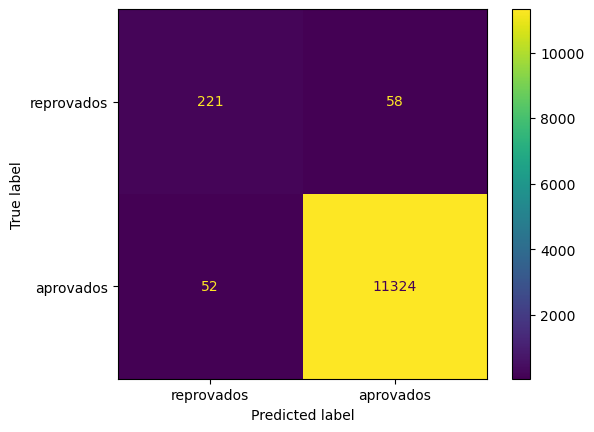

In [94]:
matriz_de_confusao = ConfusionMatrixDisplay(cm_train, display_labels = ['reprovados', 'aprovados'])

matriz_de_confusao.plot()

In [95]:
acc_train = accuracy_score(y_train, clf.predict(X_train))
print(f'Acuracia:{acc_train: .2%}')

Acuracia: 99.06%


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [90]:
cm_test = confusion_matrix(y_test, clf.predict(X_test), labels = clf.classes_)

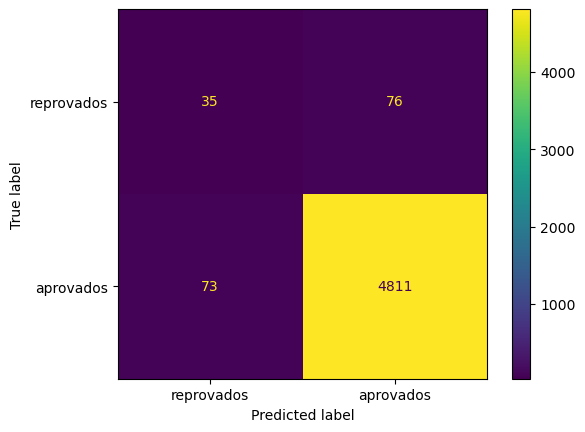

In [91]:
matriz_de_confusao = ConfusionMatrixDisplay(cm_test, display_labels = ['reprovados', 'aprovados'])

matriz_de_confusao.plot()

In [83]:
acc_test = accuracy_score(y_test, clf.predict(X_test))
print(f'Acuracia:{acc_test: .2%}')

Acuracia: 97.02%


In [89]:
print(f' Acuracia treino:{acc_train: .2%}\n Acuracia teste: {acc_test: .2%}')

 Acuracia treino: 99.06%
 Acuracia teste:  97.02%


In [115]:
clf_pruned = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf_pruned = clf.fit(X_train,y_train)

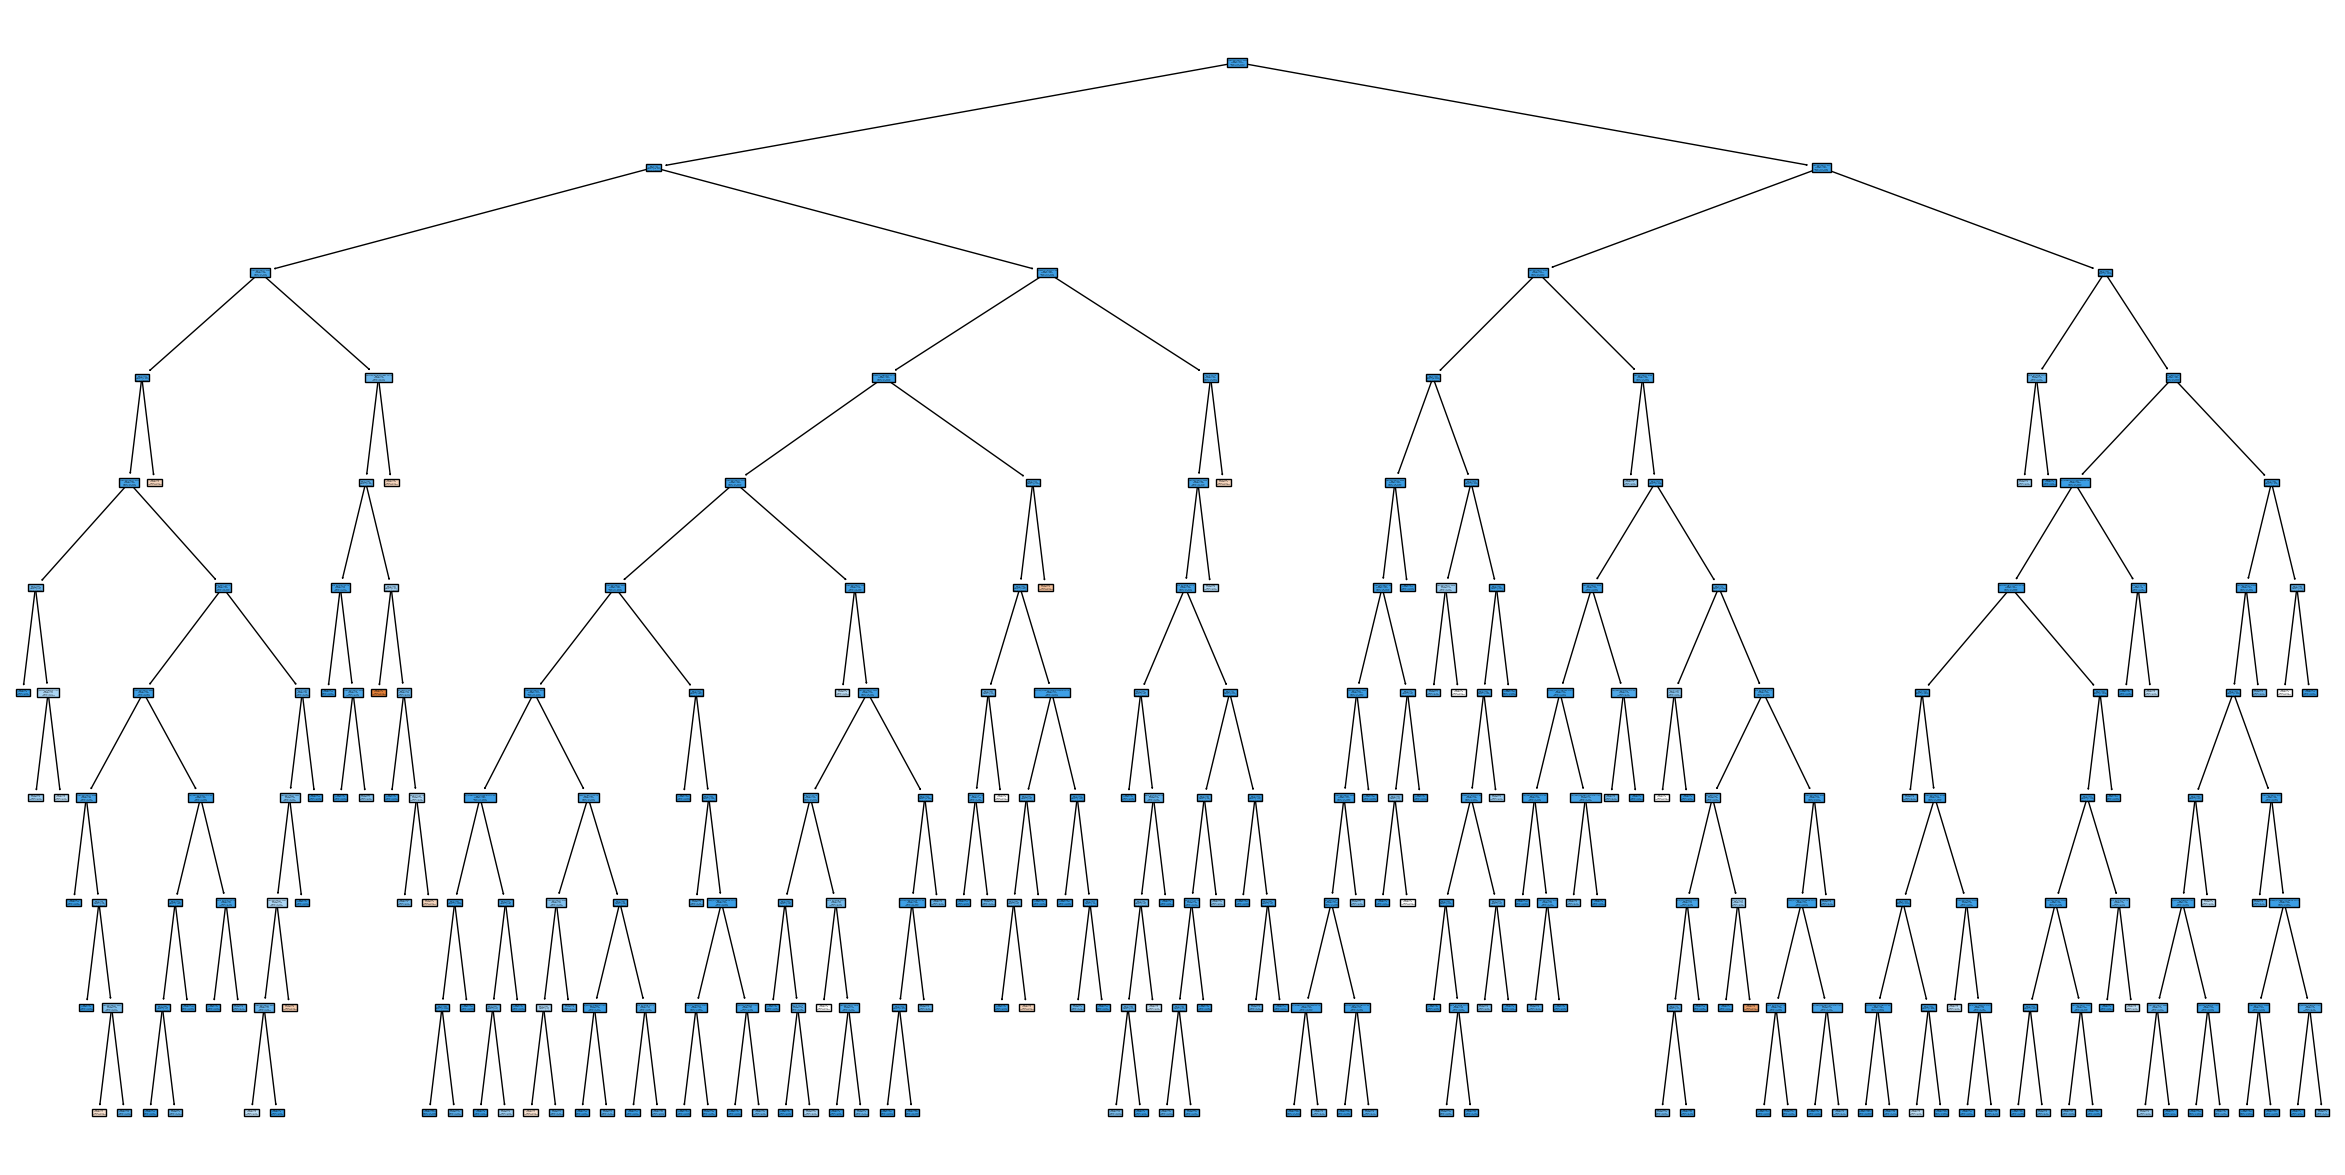

In [116]:
plt.figure(figsize = (30, 15))
plot_tree(clf_pruned,
          filled = True,
          class_names = ['reprovados', 'aprovados'],
          feature_names = list(X_train.columns));

In [120]:
cm_train_pruned = confusion_matrix(y_train, clf_pruned.predict(X_train), labels = clf_pruned.classes_)

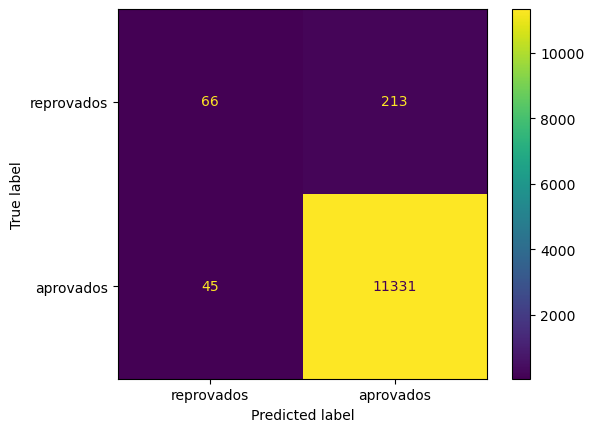

In [121]:
matriz_de_confusao = ConfusionMatrixDisplay(cm_train_pruned, display_labels = ['reprovados', 'aprovados'])

matriz_de_confusao.plot()

In [126]:
acc_pruned_train = accuracy_score(y_train, clf_pruned.predict(X_train))
print(f'Acuracia:{acc_pruned_train: .2%}')

Acuracia: 97.79%


In [122]:
cm_test_pruned = confusion_matrix(y_test, clf_pruned.predict(X_test), labels = clf_pruned.classes_)

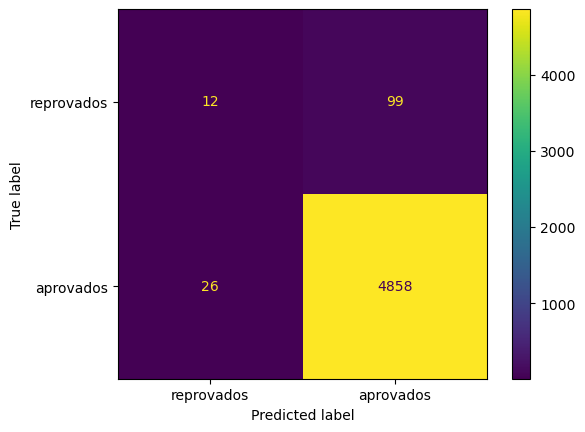

In [128]:
matriz_de_confusao = ConfusionMatrixDisplay(cm_test_pruned, display_labels = ['reprovados', 'aprovados'])

matriz_de_confusao.plot()

In [125]:
acc_pruned_test = accuracy_score(y_test, clf_pruned.predict(X_test))
print(f'Acuracia:{acc_pruned_test: .2%}')

Acuracia: 97.50%


In [143]:
#Soma dos reprovados com os aprovados
(26 + 4858) = 4884
(12 + 99) = 111

4884

In [153]:
#Calculo da nova acuracia
x = (0+4884)/(0+4884+111+0)
print(f'Nova acuracia:{x: .2%}')

Nova acuracia: 97.78%
